In [292]:
import matplotlib.pyplot as plt
import numpy as np

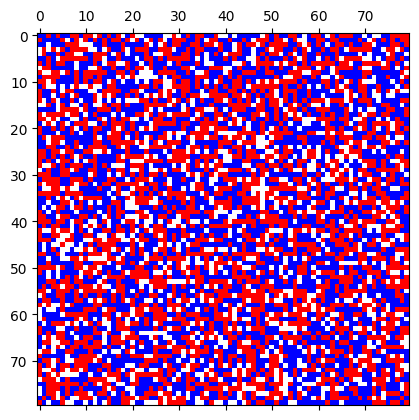

In [293]:
N = 80

lattice = np.random.choice([0, -1, +1], size=(N,N), p=[0.20, 0.4, 0.4])
plt.matshow(lattice, cmap = 'bwr')

In [294]:
def unoccupied(lat):
    return np.argwhere(lat == 0)


def is_happy(lat, p_tresh):
    satisfied = 0
    happy = []
    unhappy =[]
    happiness = []

    for i in range(len(lat)):
        for j in range(len(lat)):
            if lat[i, j] != 0:
                neighbors = (lat[(i+1) % N, j],
                        lat[(i-1) % N, j],
                        lat[i, (j+1) % N],
                        lat[i, (j-1) % N],
                        lat[(i-1)%N, (j+1) % N],
                        lat[(i-1)%N, (j-1) % N],
                        lat[(i+1)%N, (j-1) % N],
                        lat[(i+1)%N, (j+1) % N])
                
                neighbors_arr = np.array(neighbors)
                neighbors_arr = neighbors_arr[neighbors_arr != 0]
            
                if len(neighbors_arr) == 0:
                    continue

                if lat[i, j] == 1:
                    same = np.sum(neighbors_arr == 1)
                    if (same/len(neighbors_arr)) >= p_tresh:
                        satisfied += 1
                        happy.append([i,j])
                    else:
                        unhappy.append([i,j])
                
                    happiness.append(same/len(neighbors_arr)) 
                
                elif lat[i,j] == -1:
                    same = np.sum(neighbors_arr == -1)
                    if (same/len(neighbors_arr)) >= p_tresh:
                        satisfied += 1
                        happy.append([i,j])
                    else:
                        unhappy.append([i,j])

                    happiness.append(same/len(neighbors_arr))

    average_happiness = np.sum(happiness) / np.count_nonzero(lat) if happiness else 0

    
    return satisfied, happy, unhappy, average_happiness

def move(lat, unhappy, unoccupied):
    if len(unhappy) == 0 or len(unoccupied) == 0:
        return lat 

    # Shuffle the lists of unhappy agents and unoccupied spaces to ensure randomness
    np.random.shuffle(unhappy)
    np.random.shuffle(unoccupied)

    # Move as many unhappy agents to unoccupied spaces as possible
    for i in range(min(len(unhappy), len(unoccupied))):
        y_unhappy, x_unhappy = unhappy[i]
        y_unoccupied, x_unoccupied = unoccupied[i]

        # Swap the agent and the unoccupied space
        lat[y_unhappy, x_unhappy], lat[y_unoccupied, x_unoccupied] = lat[y_unoccupied, x_unoccupied], lat[y_unhappy, x_unhappy]

    return lat

def run(steps, lattice, sample, unhappy, unoccupy, ave, p_treshold):
    for _ in range(steps):
    
        if len(unhappy) == 0:
            break


        lattice = move(lattice, unhappy, unoccupy)
        unoccupy = unoccupied(lattice)
        sample = is_happy(lattice, p_treshold)
        unhappy = sample[2]
        ave.append(sample[3])
        
    return ave

In [295]:
lattice1 = np.random.choice([0, -1, +1], size=(N,N), p=[0.20, 0.40, 0.40])
lattice2 = np.random.choice([0, -1, +1], size=(N,N), p=[0.20, 0.40, 0.40])

p_treshold = 0.5
p_treshold1 = 0.6
p_treshold2 = 0.7

sample = is_happy(lattice, p_treshold)
sample1 = is_happy(lattice1, p_treshold1)
sample2 = is_happy(lattice2, p_treshold2)

unhappy = sample[2]
unhappy1 = sample1[2]
unhappy2 = sample2[2]


unoccupy = unoccupied(lattice)
unoccupy1 = unoccupied(lattice1)
unoccupy2 = unoccupied(lattice2)

ave = [sample[3]]
ave1 = [sample1[3]]
ave2 = [sample2[3]]

steps = 100
    

In [296]:
ave_happy = run(steps, lattice, sample, unhappy, unoccupy, ave,p_treshold)
ave_happy1 = run(steps, lattice1, sample1, unhappy1, unoccupy1, ave1, p_treshold1)
ave_happy2 = run(steps, lattice2, sample2, unhappy2, unoccupy2, ave2, p_treshold2)

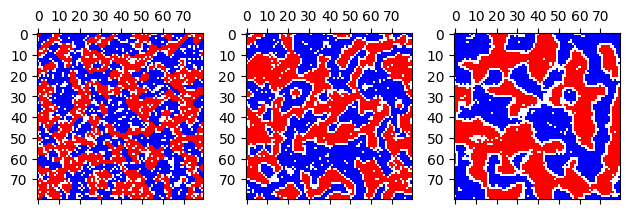

In [297]:
fig, ax = plt.subplots(1, 3)
ax[0].matshow(lattice, cmap = 'bwr')
ax[1].matshow(lattice1, cmap = 'bwr')
ax[2].matshow(lattice2, cmap = 'bwr')
fig.tight_layout()


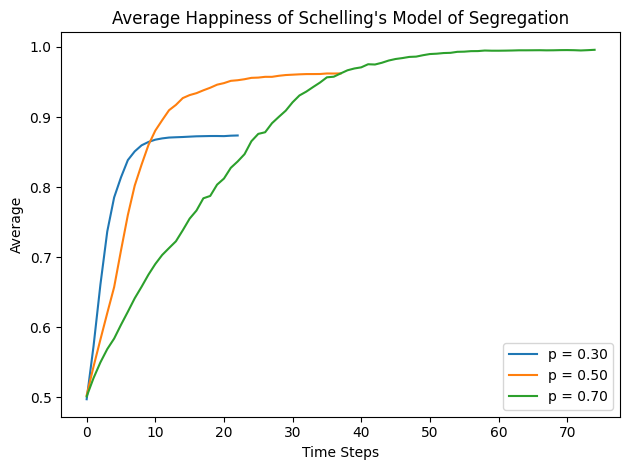

In [298]:
x = [ave_happy,ave_happy1,ave_happy2]
x_min = min(x, key = len)
min_length = len(x_min)

ave_happy = ave_happy
ave_happy1 = ave_happy1
ave_happy2 = ave_happy2

fig, ax = plt.subplots()
ax.plot(ave_happy, label='p = 0.30')
ax.plot(ave_happy1, label='p = 0.50')
ax.plot(ave_happy2, label='p = 0.70')
ax.set_xlabel('Time Steps')
ax.set_ylabel('Average')
ax.set_title("Average Happiness of Schelling's Model of Segregation")
fig.tight_layout()
ax.legend()